#Importação das bibliotecas e da base de dados


In [ ]:
#Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
#Atribuindo base de dados a uma variável
df = pd.read_csv('iris.csv')

#Tradução da base de dados



In [ ]:
#Tradução das colunas
df.rename(columns={'sepal.length': 'comprimento.sepala'}, inplace=True)
df.rename(columns={'sepal.width': 'largura.sepala'}, inplace=True)
df.rename(columns={'petal.length': 'comprimento.petala'}, inplace=True)
df.rename(columns={'petal.width': 'largura.petala'}, inplace=True)
df.rename(columns={'variety': 'variedade_planta'}, inplace=True)

#Análise exploratória simples


In [ ]:
df.columns

Index(['comprimento.sepala', 'largura.sepala', 'comprimento.petala',
       'largura.petala', 'variedade_planta'],
      dtype='object')

In [ ]:
df.head()

,comprimento.sepala,largura.sepala,comprimento.petala,largura.petala,variedade_planta
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   comprimento.sepala  150 non-null    float64
 1   largura.sepala      150 non-null    float64
 2   comprimento.petala  150 non-null    float64
 3   largura.petala      150 non-null    float64
 4   variedade_planta    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,comprimento.sepala,largura.sepala,comprimento.petala,largura.petala
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#Verificar a qntd de valores nulos de cada coluna
df.isnull().sum()

,0
comprimento.sepala,0
largura.sepala,0
comprimento.petala,0
largura.petala,0
variedade_planta,0


#Análise exploratória


In [ ]:
df_corr = df.drop('variedade_planta', axis = 1)

In [ ]:
df_corr

,comprimento.sepala,largura.sepala,comprimento.petala,largura.petala
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


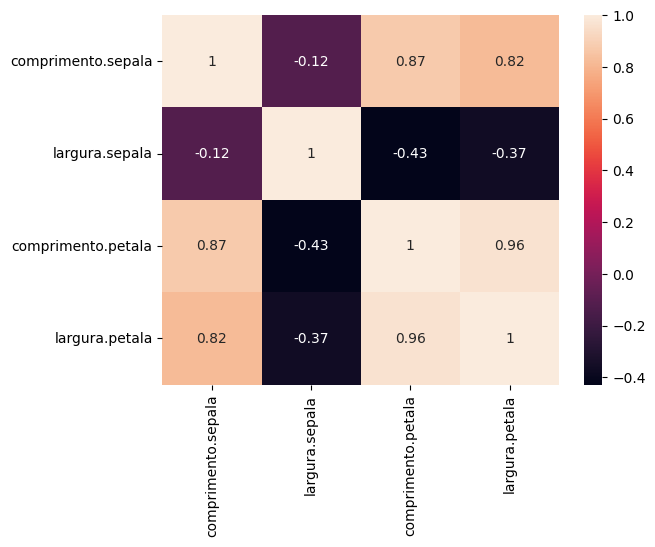

In [ ]:
#Gráfico de correlação entre variáveis numéricas
sns.heatmap(df_corr.corr(), annot = True);

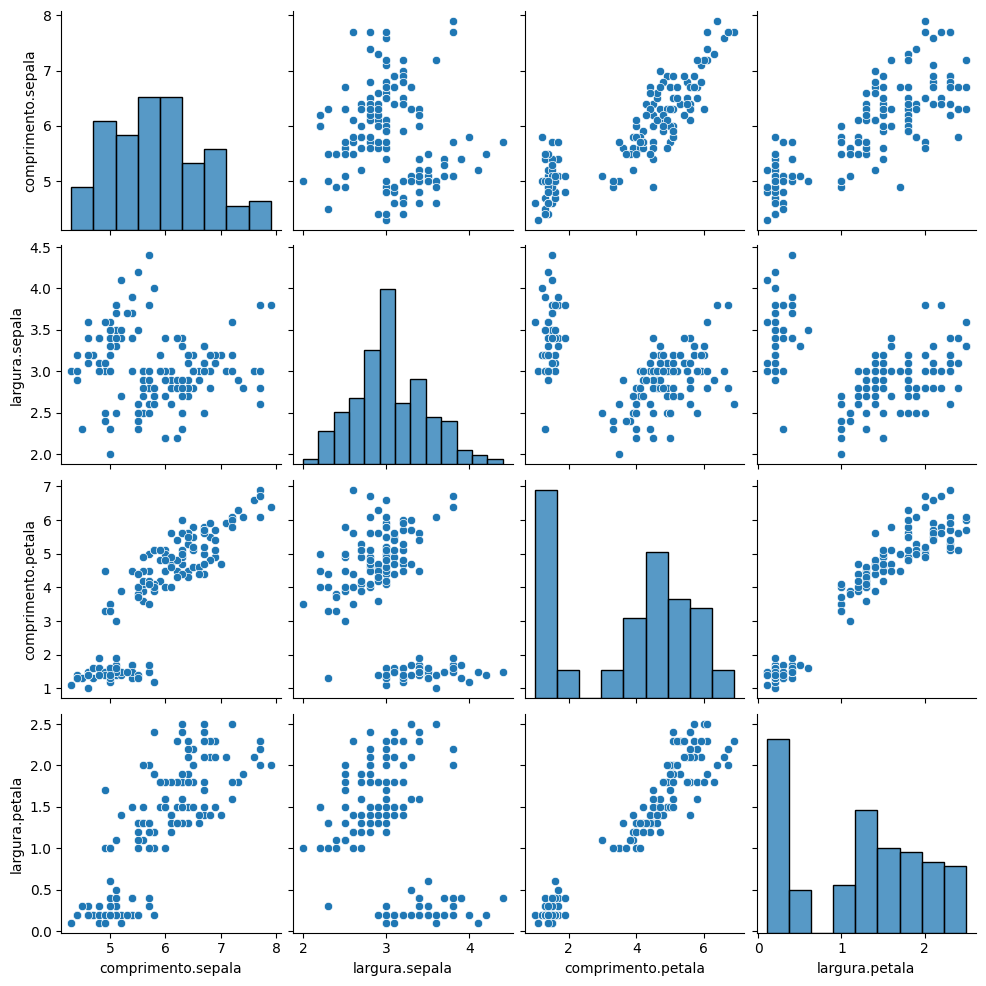

In [ ]:
#Permite verificar as correlações entre todas as colunas
sns.pairplot(df)

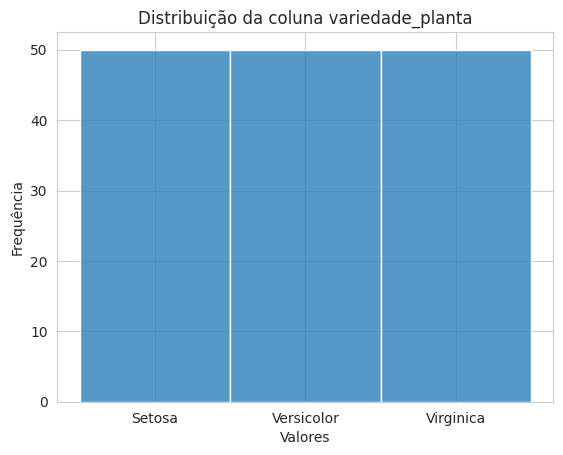

In [ ]:
# Gráfico de distribuição
sns.histplot(df['variedade_planta'], kde=False, bins=30)

# Adicionar rótulos e título
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Distribuição da coluna variedade_planta')
plt.show()

# Treinamento e adequação dos dados

In [ ]:
#Separação de dados e variável target
X = df.drop('variedade_planta', axis = 1)
y = df['variedade_planta']

In [ ]:
# Separa os dados em treinamento e teste com 30% da base para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
#Normalizando os dados
# Cria uma instância do normalizador
normalizador = MinMaxScaler()

# Normaliza o X_train e aprende quais são os valores mínimos e máximos de cada coluna de X
X_train = normalizador.fit_transform(X_train)

# Normaliza o X_test com os valores mínimos e máximos de cada coluna de X do X_train
X_test = normalizador.transform(X_test)

#Treinamento do modelo e fazendo predict

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
#Treinamento do modelo

knn = KNeighborsClassifier(n_neighbors=5)  # n_neighbors é o número de vizinhos
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#Predizendo modelo
y_pred = knn.predict(X_test)

#Avaliação do modelo

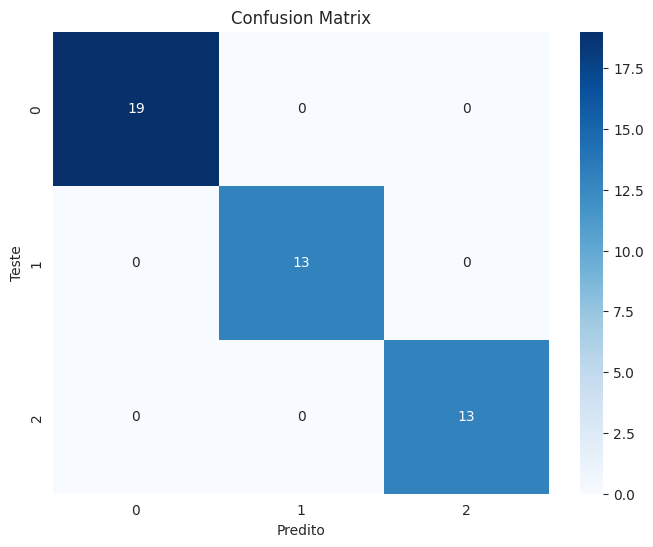

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       1.00      1.00      1.00        13
   Virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
#Função para avaliar modelos de classificação

def avaliar_model(y_test, y_pred):
    # Criando a matriz de confusão
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plotando a matriz de confusão com um heatmap
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap="Blues")
    plt.xlabel('Predito')
    plt.ylabel('Teste')
    plt.title('Confusion Matrix')
    plt.show()

    # Exibindo o classification report
    print(classification_report(y_test, y_pred))


avaliar_model(y_test, y_pred)